# Read The Dataset

In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/akaks/Downloads/50_Startups.csv")

In [2]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Checking Null Values

In [4]:
A.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
#There are no null values

# Exploratory Data Aanlysis

In [6]:
A.corr()['PROFIT']

RND       0.972900
ADMIN     0.200717
MKT       0.747766
PROFIT    1.000000
Name: PROFIT, dtype: float64

In [7]:
#RND and MKT having the good Correlation with PROFIT

C:\Users\akaks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STATE', ylabel='PROFIT'>

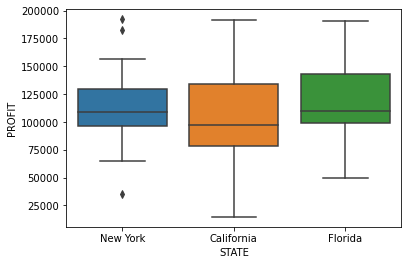

In [8]:
import seaborn as sb
sb.boxplot(A['STATE'],A['PROFIT'])

In [9]:
#from boxplot we can clearly see that there is no any solid relation between PROFIT and STATE, so we will ignore STATE.

# Defining X and Y

from above EDA we saw that only RND and MKT have good correlation with PROFIT so we will be using those features as X to predict Profit(Y)

In [10]:
X = A[['RND']]
Y = A[['PROFIT']]

# Checking Skew

In [11]:
A.skew()

RND       0.164002
ADMIN    -0.489025
MKT      -0.046472
PROFIT    0.023291
dtype: float64

In [12]:
#As skew may produce bias in model, but the selected features are normally distributed so there will be no problem

# Dividing data into training and testing set

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

# Creating Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Training the Model

In [15]:
model = lm.fit(xtrain,ytrain)

In [25]:
b1 = round(model.coef_[0][0],2)

In [29]:
b0 = round(model.intercept_[0],2)

In [30]:
print("Y-intercept: ",b0,"\nslope: ",b1)

Y-intercept:  49320.11 
slope:  0.86


# Creating Predictions

In [33]:
pred_ts = model.predict(xtest)

In [41]:
pred_tr = model.predict(xtrain)

In [35]:
ytest['pred_profit'] = pred_ts

<ipython-input-35-b816d9afc605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest['pred_profit'] = pred_ts


In [36]:
ytest

,PROFIT,pred_profit
7,155752.60,160897.399592
44,65200.33,68311.422541
43,69758.98,62598.026901
25,107404.34,104693.992280
14,132602.65,152030.269092
2,191050.39,180715.608254
23,108733.99,107149.772514
31,97483.56,101672.602139
17,125370.37,130377.217132
47,42559.73,49320.113624


In [43]:
ytrain["pred_profit"] = pred_tr

<ipython-input-43-a02c6e305f32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain["pred_profit"] = pred_tr


In [45]:
#ytrain

In [49]:
from sklearn.metrics import mean_absolute_error
ts_err = mean_absolute_error(ytest['PROFIT'],ytest['pred_profit'])
tr_err = mean_absolute_error(ytrain['PROFIT'],ytrain['pred_profit'])
print("=========>>>>>TRAINING ERROR<<<<<<=======")
print(tr_err,'\n')
print("=========>>>>>TESTING ERROR<<<<<<========")
print(ts_err)

=========>>>>>TRAINING ERROR<<<<<<=======
7045.56695142361 

=========>>>>>TESTING ERROR<<<<<<========
6543.008416944333


# Plotting regression results

Text(0.5, 1.0, 'Regression line for RND vs PROFIT')

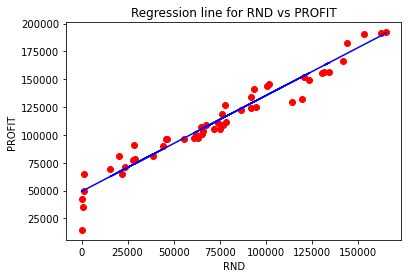

In [58]:
import matplotlib.pyplot as plt
plt.scatter(X,Y,c='red')
plt.plot(X,b0+b1*X,c='blue')
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.title("Regression line for RND vs PROFIT")

# Multiple Linear Regression

In [60]:
X = A[['RND','MKT']]
Y = A[['PROFIT']]

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [63]:
model = lm.fit(xtrain,ytrain)

In [65]:
pred_ts = model.predict(xtest)
ytest['pred_profit'] = pred_ts

<ipython-input-65-5a0c5cb2b7f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest['pred_profit'] = pred_ts


In [66]:
pred_tr = model.predict(xtrain)
ytrain["pred_profit"] = pred_tr

<ipython-input-66-a654869154e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain["pred_profit"] = pred_tr


In [67]:
from sklearn.metrics import mean_absolute_error
ts_err = mean_absolute_error(ytest['PROFIT'],ytest['pred_profit'])
tr_err = mean_absolute_error(ytrain['PROFIT'],ytrain['pred_profit'])
print("=========>>>>>TRAINING ERROR<<<<<<=======")
print(tr_err,'\n')
print("=========>>>>>TESTING ERROR<<<<<<========")
print(ts_err)

=========>>>>>TRAINING ERROR<<<<<<=======
6734.696630502678 

=========>>>>>TESTING ERROR<<<<<<========
5916.047378112382
